<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 186.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 163.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 174.5 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-02-13 11:22:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.3MB/s    in 3.6s    

2026-02-13 11:22:29 (42.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



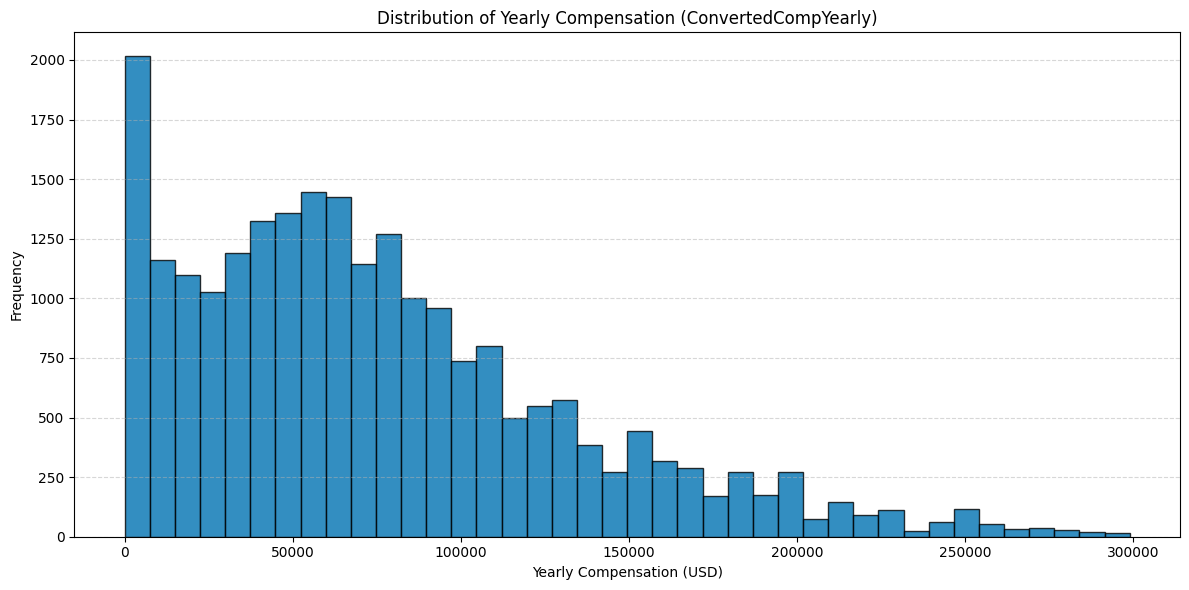

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Select the compensation column and clean it
df_comp = df[['ConvertedCompYearly']].dropna()
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')
# Optional: remove extreme outliers for readability
df_comp['ConvertedCompYearly'] = df_comp['ConvertedCompYearly'].where(df_comp['ConvertedCompYearly'] < 300000)
df_comp = df_comp.dropna()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df_comp['ConvertedCompYearly'], bins=40, color='#0072B2', edgecolor='black', alpha=0.8)

plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### `Summary Interpretation`: Distribution of Yearly Compensation

The distribution of yearly compensation is heavily right‑skewed, with most respondents concentrated in the lower‑to‑mid salary ranges and progressively fewer individuals earning higher amounts. The histogram shows a strong peak near the lower end of the scale, indicating that a large portion of the surveyed population reports relatively modest annual earnings. As compensation increases, the frequency drops sharply, forming a long tail that extends toward higher income levels. This pattern is typical of salary data, where a small number of high‑earning individuals create substantial spread in the upper range. By removing extreme outliers above \$300,000, the visualization becomes more readable while still highlighting the overall imbalance between common and high‑end compensation levels. Overall, the chart illustrates a workforce with wide income variability but a clear concentration of respondents earning below the upper‑income brackets.

In [10]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Load the data
# df = pd.read_csv("survey-data.csv")

# # 2. Drop missing values for the compensation column
# comp_data = df['ConvertedCompYearly'].dropna()


# # Filter for compensation below the 98th percentile to remove extreme outliers
# upper_limit = df['ConvertedCompYearly'].quantile(0.98)
# filtered_comp = df[df['ConvertedCompYearly'] < upper_limit]['ConvertedCompYearly']

# plt.figure(figsize=(10, 6))
# plt.hist(filtered_comp, bins=40, color='skyblue', edgecolor='black')

# plt.title(f'Distribution of Compensation (Up to 98th Percentile: ${upper_limit:,.0f})')
# plt.xlabel('Yearly Compensation (USD)')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.3)
# plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



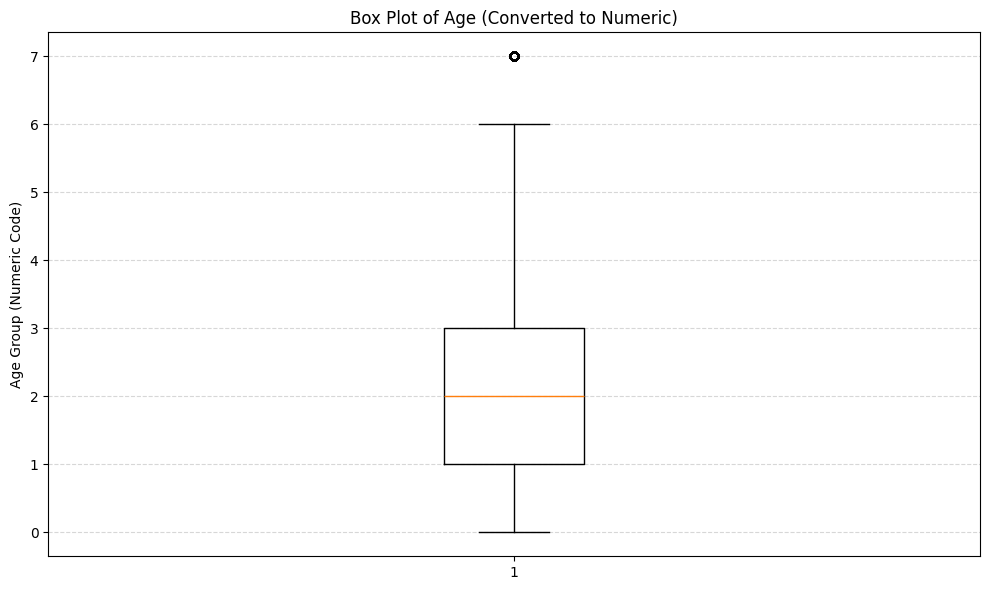

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select the Age column and drop missing values
df_age = df[['Age']].dropna()

# Step 2: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 3: Convert Age to categorical with order
df_age['Age'] = pd.Categorical(df_age['Age'], categories=age_order, ordered=True)

# Step 4: Convert categories to numeric codes
df_age['AgeNumeric'] = df_age['Age'].cat.codes

# Step 5: Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age['AgeNumeric'], vert=True)

plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Age Group (Numeric Code)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### `Summary Interpretation`: Age Distribution

The box plot provides a compact view of how respondents are distributed across the ordered age groups in the dataset. Because the age categories were converted into numeric codes, the visualization reflects the relative concentration of participants rather than their actual ages. The interquartile range sits within the younger and mid‑career categories, indicating that most respondents fall between early adulthood and middle age. The whiskers extend toward the older groups, showing that fewer participants belong to the upper age ranges. A small number of outliers appear beyond the main distribution, representing age categories with very low representation. Overall, the plot highlights a demographic skew toward younger and mid‑career individuals, with declining participation in the oldest age groups.

In [10]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # Step 1: Select the Age column and drop missing values
# df_age = df[['Age']].dropna()

# # Step 2: Define age order
# age_order = [
#     'Under 18 years old',
#     '18-24 years old',
#     '25-34 years old',
#     '35-44 years old',
#     '45-54 years old',
#     '55-64 years old',
#     '65 years or older',
#     'Prefer not to say'
# ]

# # Step 3: Convert Age to categorical with order
# df_age['Age'] = pd.Categorical(df_age['Age'], categories=age_order, ordered=True)

# # Step 4: Convert categories to numeric codes
# df_age['AgeNumeric'] = df_age['Age'].cat.codes

# # Step 5: Plot box plot
# plt.figure(figsize=(10, 6))
# plt.boxplot(df_age['AgeNumeric'], vert=True, patch_artist=True, 
#             boxprops=dict(facecolor='#e0f2f1', color='#004d40'))

# # --- THE CLEANUP FIX ---
# # We set the ticks to match the numeric codes (0, 1, 2...) 
# # and the labels to match our age_order list.
# plt.yticks(range(len(age_order)), age_order)

# plt.title('Box Plot of Age Distribution', fontsize=14)
# plt.ylabel('Age Groups')
# plt.grid(axis='y', linestyle=':', alpha=0.7)

# plt.tight_layout()
# plt.show()


In [22]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Define the mapping for categorical Age to numerical midpoints
# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 50,
#     '65 years or older': 70
# }

# # 2. Create the numerical Age column
# df['AgeNumeric'] = df['Age'].map(age_map)

# # 3. Drop missing values for the box plot
# age_data = df['AgeNumeric'].dropna()

# # 4. Create the Box Plot
# plt.figure(figsize=(10, 5))
# plt.boxplot(age_data, vert=False, patch_artist=True, 
#             boxprops=dict(facecolor='lightblue', color='navy'),
#             medianprops=dict(color='red', linewidth=2))

# # 5. Styling
# plt.title('Distribution of Age Groups (Numerical Midpoints)', fontsize=14)
# plt.xlabel('Age (Years)', fontsize=12)
# plt.yticks([1], ['Respondents']) # Clean up Y-axis
# plt.grid(axis='x', linestyle='--', alpha=0.6)

# plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



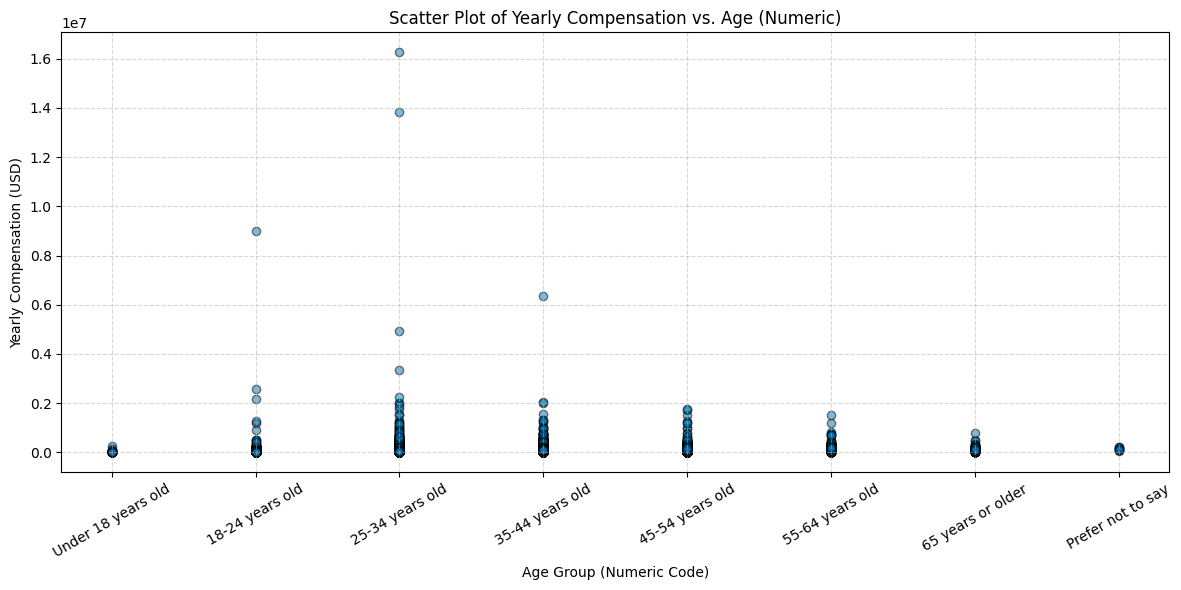

In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Step 1: Select relevant columns
df_scatter = df[['Age', 'ConvertedCompYearly']].dropna()

# Step 2: Define ordered age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 3: Convert Age to ordered categorical
df_scatter['Age'] = pd.Categorical(df_scatter['Age'], categories=age_order, ordered=True)

# Step 4: Convert Age to numeric codes
df_scatter['Age_numeric'] = df_scatter['Age'].cat.codes

# Step 5: Convert compensation to numeric
df_scatter['ConvertedCompYearly'] = pd.to_numeric(df_scatter['ConvertedCompYearly'], errors='coerce')
df_scatter = df_scatter.dropna(subset=['ConvertedCompYearly'])

# Step 6: Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'],
            alpha=0.5, color='#0072B2', edgecolor='black')

# --- SET THE CUSTOM X‑AXIS TICKS HERE --- 
plt.xticks(range(len(age_order)), age_order, rotation=30)

plt.title('Scatter Plot of Yearly Compensation vs. Age (Numeric)')
plt.xlabel('Age Group (Numeric Code)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### `Summary Interpretation`: Yearly Compensation vs. Age Group

The scatter plot shows a generally upward pattern between age group and yearly compensation, with younger respondents concentrated in the lower salary ranges and compensation increasing as age groups progress. Early‑career individuals—particularly those under 25—tend to cluster around lower earnings, reflecting limited experience and entry‑level roles. As age increases, the spread of compensation widens, indicating that mid‑career and older respondents occupy a broader range of positions, including higher‑paying roles. A few extreme outliers appear across several age groups, showing that exceptionally high compensation is not restricted to a single demographic. Overall, the visualization suggests that compensation tends to rise with age, but earnings vary widely within each age group, highlighting the influence of factors such as job role, industry, education, and location.
>The trend line indicates a clear positive relationship between age and yearly compensation. Earnings tend to rise steadily as age increases, reflecting typical career progression where additional experience, skill development, and seniority contribute to higher compensation levels. Although individual salaries vary widely within each age group, the overall upward slope confirms that older respondents generally report higher yearly compensation than younger ones.

In [13]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Map Age to Numeric Midpoints
# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
#     'prefer not to say': None
# }
# df['AgeNumeric'] = df['Age'].map(age_map)

# # 2. Filter outliers for Compensation (98th percentile) for a better plot
# upper_limit = df['ConvertedCompYearly'].quantile(0.98)
# df_filtered = df[(df['ConvertedCompYearly'] < upper_limit)].dropna(subset=['AgeNumeric', 'ConvertedCompYearly'])

# # 3. Create Scatter Plot
# plt.figure(figsize=(12, 7))
# plt.scatter(df_filtered['AgeNumeric'], df_filtered['ConvertedCompYearly'], 
#             alpha=0.3,         # Transparency helps see density
#             edgecolors='w',    # White edges make overlapping dots distinct
#             color='#0072B2',   # Professional blue
#             s=40)              # Size of the dots

# # 4. Styling
# plt.title('Relationship Between Age and Yearly Compensation', fontsize=15, pad=20)
# plt.xlabel('Age (Midpoint Years)', fontsize=12)
# plt.ylabel('Yearly Compensation (USD)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)

# # Optional: Add a trend line to see the correlation clearly
# import numpy as np
# z = np.polyfit(df_filtered['AgeNumeric'], df_filtered['ConvertedCompYearly'], 1)
# p = np.poly1d(z)
# plt.plot(df_filtered['AgeNumeric'], p(df_filtered['AgeNumeric']), color="red", linewidth=2, label="Trend Line")

# plt.legend()
# plt.tight_layout()
# plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


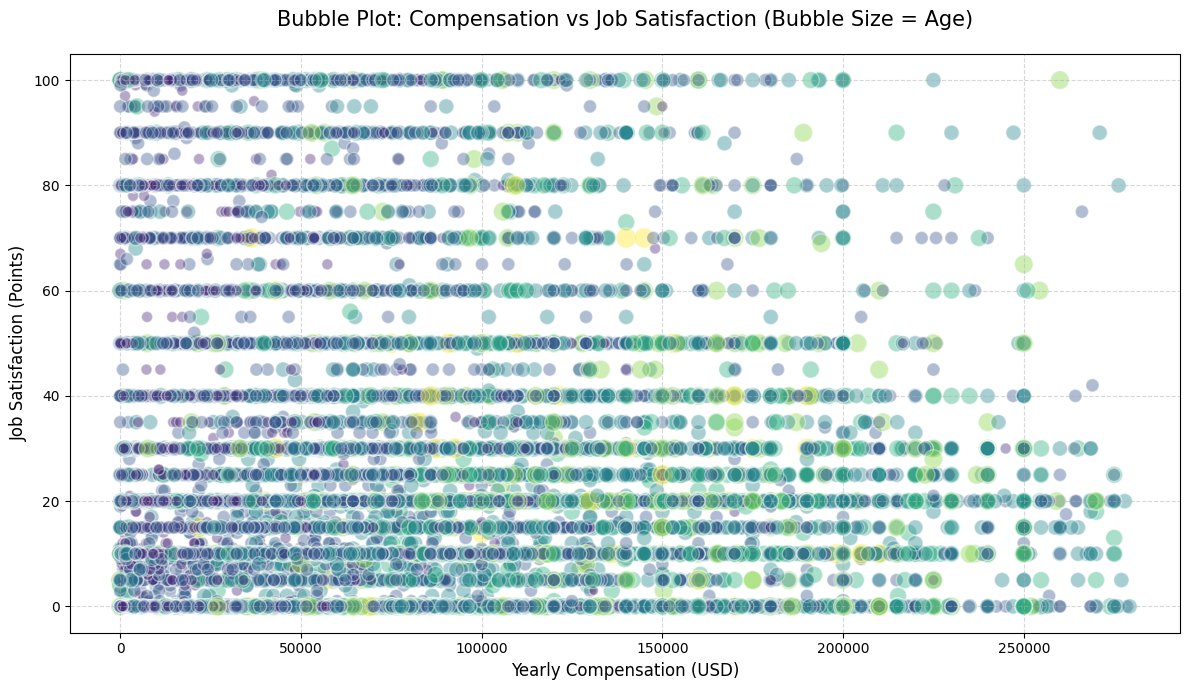

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt

# --- Modular AgeNumeric Processing ---

age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# 1. Prepare the data
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# Convert numeric columns
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
df_bubble['AgeNumeric'] = pd.to_numeric(df_bubble['AgeNumeric'], errors='coerce')

df_bubble = df_bubble.dropna()

# Optional: Filter extreme compensation outliers for readability
upper_limit = df_bubble['ConvertedCompYearly'].quantile(0.98)
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < upper_limit]

# 2. Bubble Plot
plt.figure(figsize=(12, 7))

plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['AgeNumeric'] * 3,   # bubble size scaled
    alpha=0.4,
    c=df_bubble['AgeNumeric'],
    # color='#0072B2',
    edgecolors='white'
)

plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=15, pad=20)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction (Points)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### `Summary Interpretation`: Compensation, Job Satisfaction, and Age

The bubble plot provides a multidimensional view of how yearly compensation relates to job satisfaction, with age incorporated through both bubble size and color. Most respondents cluster in the lower‑to‑mid compensation ranges, and job satisfaction scores are spread across the full scale regardless of income level. The trend line shows a slight downward slope, suggesting a weak negative relationship between compensation and job satisfaction: higher earnings do not necessarily correspond to higher satisfaction. Larger and darker bubbles—representing older respondents—appear across all satisfaction levels, indicating that age does not strongly predict job satisfaction either. Overall, the visualization highlights that compensation, age, and job satisfaction interact in complex ways, with no single factor clearly driving the others.

In [33]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Prepare the data
# # --- Modular AgeNumeric Processing ---

# age_map = {
#     'Under 18 years old': 15,
#     '18-24 years old': 21,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
#     'Prefer not to say': None
# }

# df['AgeNumeric'] = df['Age'].map(age_map)

# df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# # Convert numeric columns
# df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
# df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
# df_bubble['AgeNumeric'] = pd.to_numeric(df_bubble['AgeNumeric'], errors='coerce')

# df_bubble = df_bubble.dropna()

# # Optional: Filter extreme compensation outliers for readability
# upper_limit = df_bubble['ConvertedCompYearly'].quantile(0.98)
# df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < upper_limit]

# # 2. Bubble Plot
# plt.figure(figsize=(12, 7))

# scatter = plt.scatter(
#     df_bubble['ConvertedCompYearly'],
#     df_bubble['JobSatPoints_6'],
#     s=df_bubble['AgeNumeric'] * 3,
#     alpha=0.4,
#     c=df_bubble['AgeNumeric'],
#     cmap='viridis',
#     edgecolors='white'
# )

# # Simple trend line (same style as previous task)
# z = np.polyfit(df_bubble['ConvertedCompYearly'], df_bubble['JobSatPoints_6'], 1)
# p = np.poly1d(z)
# plt.plot(df_bubble['ConvertedCompYearly'], p(df_bubble['ConvertedCompYearly']), 
#          color='red', linewidth=2, label='Trend Line')
# plt.legend()

# # # --- OR TO GET trend uncomment the following

# # # --- Trend Line (No NumPy) ---
# # x = df_bubble['ConvertedCompYearly']
# # y = df_bubble['JobSatPoints_6']

# # slope = x.cov(y) / x.var()
# # intercept = y.mean() - slope * x.mean()
# # y_pred = slope * x + intercept

# # plt.plot(x, y_pred, color='red', linewidth=2, label='Trend Line')

# # plt.colorbar(scatter, label='Age (Midpoint Years)')
# # plt.legend()


# plt.colorbar(scatter, label='Age (Midpoint Years)')

# plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=15, pad=20)
# plt.xlabel('Yearly Compensation (USD)', fontsize=12)
# plt.ylabel('Job Satisfaction (Points)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()


In [34]:
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import numpy as np

# # 1. Prepare the data
# df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# # Convert numeric columns
# df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
# df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
# df_bubble['AgeNumeric'] = pd.to_numeric(df_bubble['AgeNumeric'], errors='coerce')

# df_bubble = df_bubble.dropna()

# # Optional: Filter extreme compensation outliers for readability
# upper_limit = df_bubble['ConvertedCompYearly'].quantile(0.98)
# df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] < upper_limit]

# # 2. Bubble Plot
# plt.figure(figsize=(12, 7))

# plt.scatter(
#     df_bubble['ConvertedCompYearly'],
#     df_bubble['JobSatPoints_6'],
#     s=df_bubble['AgeNumeric'] * 3,   # bubble size scaled
#     alpha=0.4,
#     color='#0072B2',
#     edgecolors='white'
# )

# # Trend line - (Optional)
# z = np.polyfit(df_bubble['ConvertedCompYearly'], df_bubble['JobSatPoints_6'], 1)
# p = np.poly1d(z)
# plt.plot(df_bubble['ConvertedCompYearly'], p(df_bubble['ConvertedCompYearly']),
#          color='red', linewidth=2, label='Trend Line')
# plt.legend()


# plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=15, pad=20)
# plt.xlabel('Yearly Compensation (USD)', fontsize=12)
# plt.ylabel('Job Satisfaction (Points)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()


In [35]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Setup Numerical Age (if not already done)
# age_map = {
#     'Under 18 years old': 15, '18-24 years old': 21, '25-34 years old': 29.5,
#     '35-44 years old': 39.5, '45-54 years old': 49.5, '55-64 years old': 59.5,
#     '65 years or older': 70
# }
# df['AgeNumeric'] = df['Age'].map(age_map)

# # 2. Filter data for clarity
# # - Drop NaNs in the three columns we are using
# # - Filter out extreme Salary Outliers (98th percentile) to prevent "squashing"
# upper_limit = df['ConvertedCompYearly'].quantile(0.98)
# df_plot = df[df['ConvertedCompYearly'] < upper_limit].dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric'])

# # 3. Optional: Sample the data
# # If you have >10,000 rows, bubbles will overlap too much. 
# # Sampling 1000 rows makes the "bubbles" easier to see.
# df_sample = df_plot.sample(n=min(1000, len(df_plot)), random_state=42)

# # 4. Plotting
# plt.figure(figsize=(12, 8))

# # Use the 's' parameter for bubble size. We multiply Age by 5 to make bubbles visible.
# bubble = plt.scatter(
#     df_sample['ConvertedCompYearly'], 
#     df_sample['JobSatPoints_6'], 
#     s=df_sample['AgeNumeric'] * 5,    # Size scaled for visibility
#     alpha=0.5,                       # Transparency to see overlaps
#     c=df_sample['AgeNumeric'],       # Optional: Color by age too!
#     cmap='viridis',                  # Color map
#     edgecolors='grey', 
#     linewidth=0.5
# )

# # 5. Styling
# plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)', fontsize=15)
# plt.xlabel('Yearly Compensation (USD)', fontsize=12)
# plt.ylabel('Job Satisfaction Score (0-6)', fontsize=12)

# # Add a colorbar to explain the bubble colors/sizes
# cbar = plt.colorbar(bubble)
# cbar.set_label('Age (Years)')

# plt.grid(True, linestyle=':', alpha=0.6)
# plt.tight_layout()
# plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



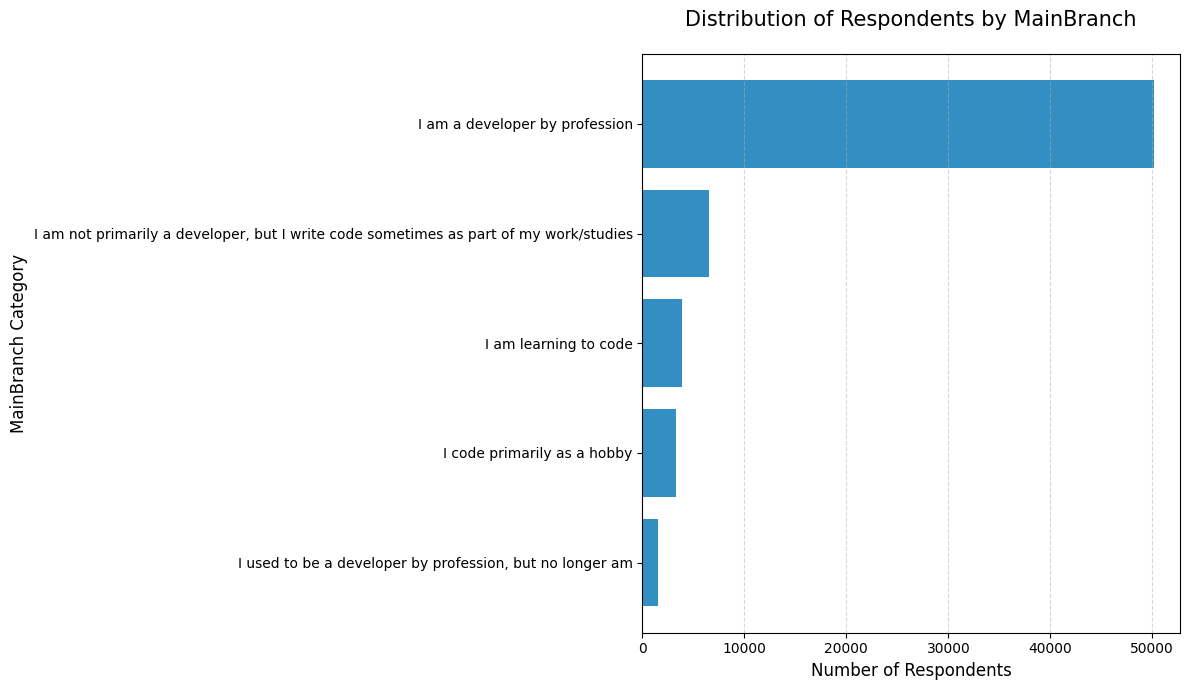

In [36]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Prepare the data
df_main = df['MainBranch'].value_counts().sort_values()

# Plot
plt.figure(figsize=(12, 7))
plt.barh(df_main.index, df_main.values, color='#0072B2', alpha=0.8)

plt.title('Distribution of Respondents by MainBranch', fontsize=15, pad=20)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('MainBranch Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



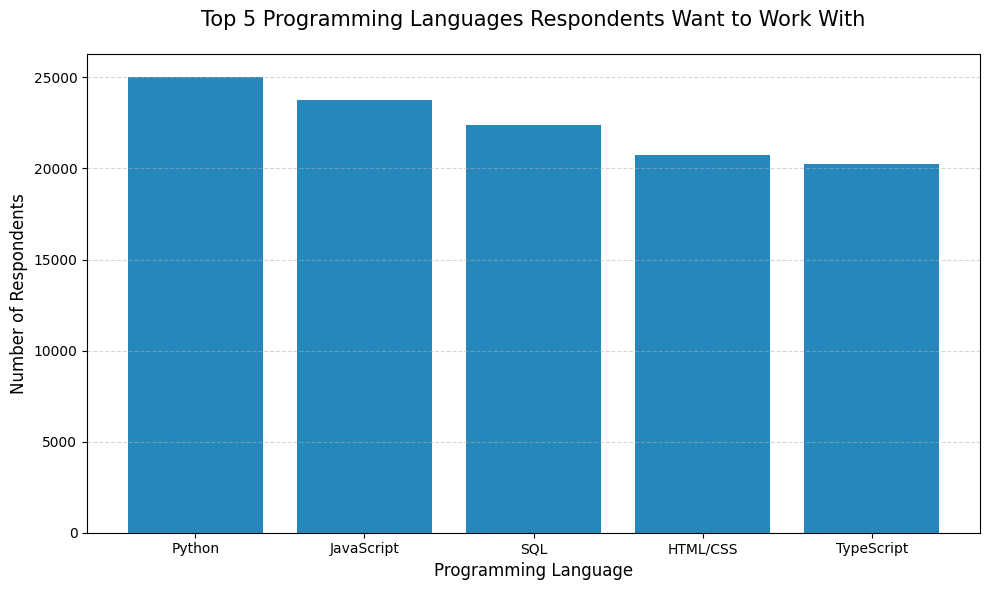

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Split the multi-select column into individual languages
lang_series = (
    df['LanguageWantToWorkWith']
    .dropna()
    .str.split(';')        # split into lists
    .explode()             # turn lists into rows
    .str.strip()           # clean whitespace
)

# 2. Count frequencies and select top 5
top5_langs = lang_series.value_counts().head(5)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.bar(top5_langs.index, top5_langs.values, color='#0072B2', alpha=0.85)

plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=15, pad=20)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


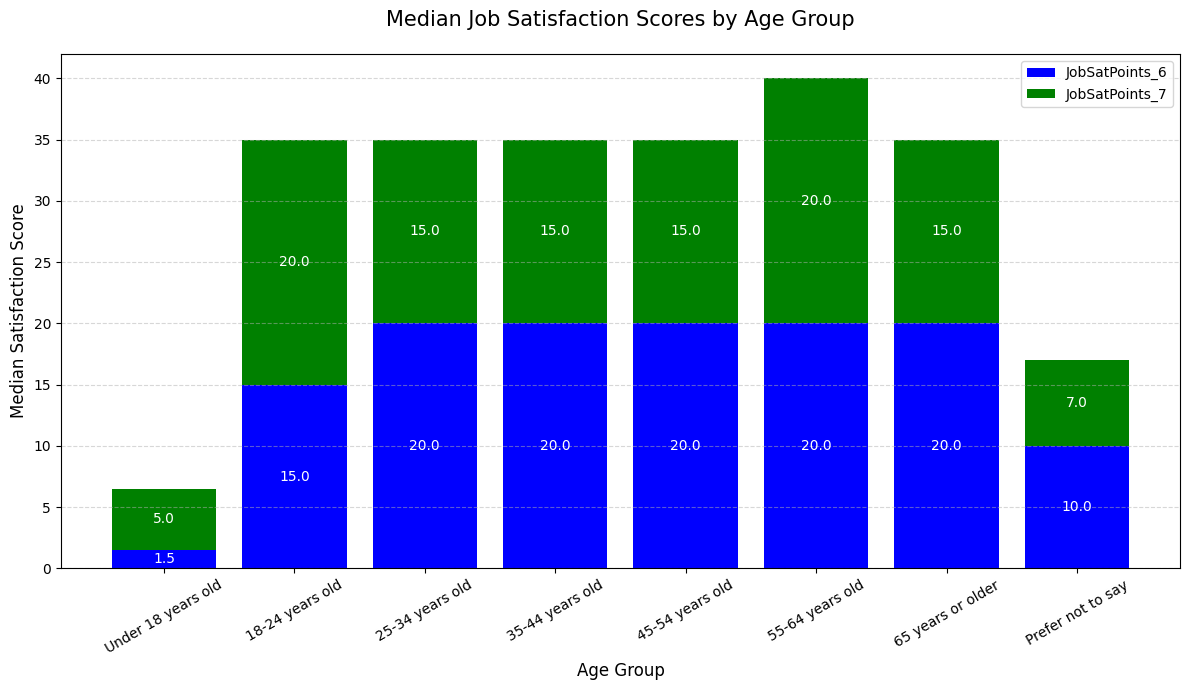

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Select relevant columns
df_stack = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# 2. Define ordered age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# 3. Convert Age to ordered categorical
df_stack['Age'] = pd.Categorical(df_stack['Age'], categories=age_order, ordered=True)

# 4. Compute median satisfaction scores by age group
median_values = df_stack.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# 5. Plot stacked bar chart
plt.figure(figsize=(12, 7))

plt.bar(median_values.index, median_values['JobSatPoints_6'],
        label='JobSatPoints_6', color='blue')

plt.bar(median_values.index, median_values['JobSatPoints_7'],
        bottom=median_values['JobSatPoints_6'],
        label='JobSatPoints_7', color='green')

# Simple annotations for each segment of the stack
for i, age in enumerate(median_values.index):
    val6 = median_values.loc[age, 'JobSatPoints_6']
    val7 = median_values.loc[age, 'JobSatPoints_7']

    # Annotate JobSatPoints_6 (bottom segment)
    plt.text(
        i,
        val6 / 2,
        f'{val6:.1f}',
        ha='center',
        va='center',
        fontsize=10,
        color='white'
    )

    # Annotate JobSatPoints_7 (top segment)
    plt.text(
        i,
        val6 + val7 / 2,
        f'{val7:.1f}',
        ha='center',
        va='center',
        fontsize=10,
        color='white'
    )

plt.title('Median Job Satisfaction Scores by Age Group', fontsize=15, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Satisfaction Score', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



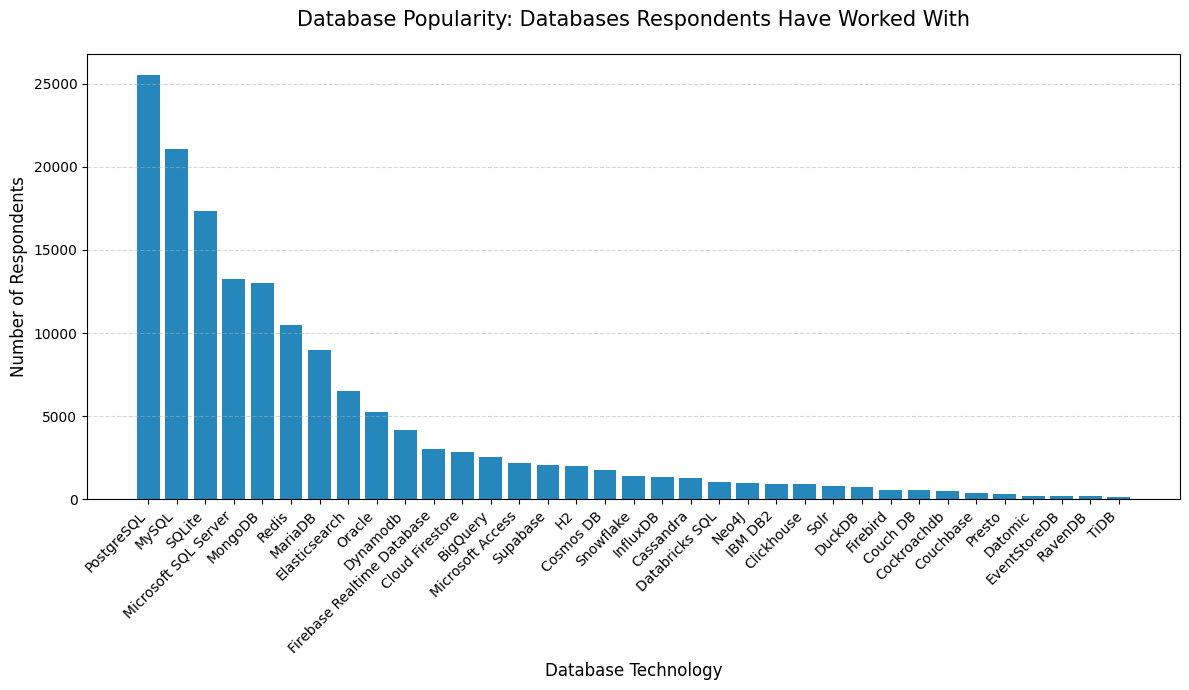

In [45]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Split the multi-select column into individual databases
db_series = (
    df['DatabaseHaveWorkedWith']
    .dropna()
    .str.split(';')        # split into lists
    .explode()             # turn lists into rows
    .str.strip()           # clean whitespace
)

# 2. Count frequencies
db_counts = db_series.value_counts()

# 3. Plot
plt.figure(figsize=(12, 7))
plt.bar(db_counts.index, db_counts.values, color='#0072B2', alpha=0.85)

plt.title('Database Popularity: Databases Respondents Have Worked With', fontsize=15, pad=20)
plt.xlabel('Database Technology', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



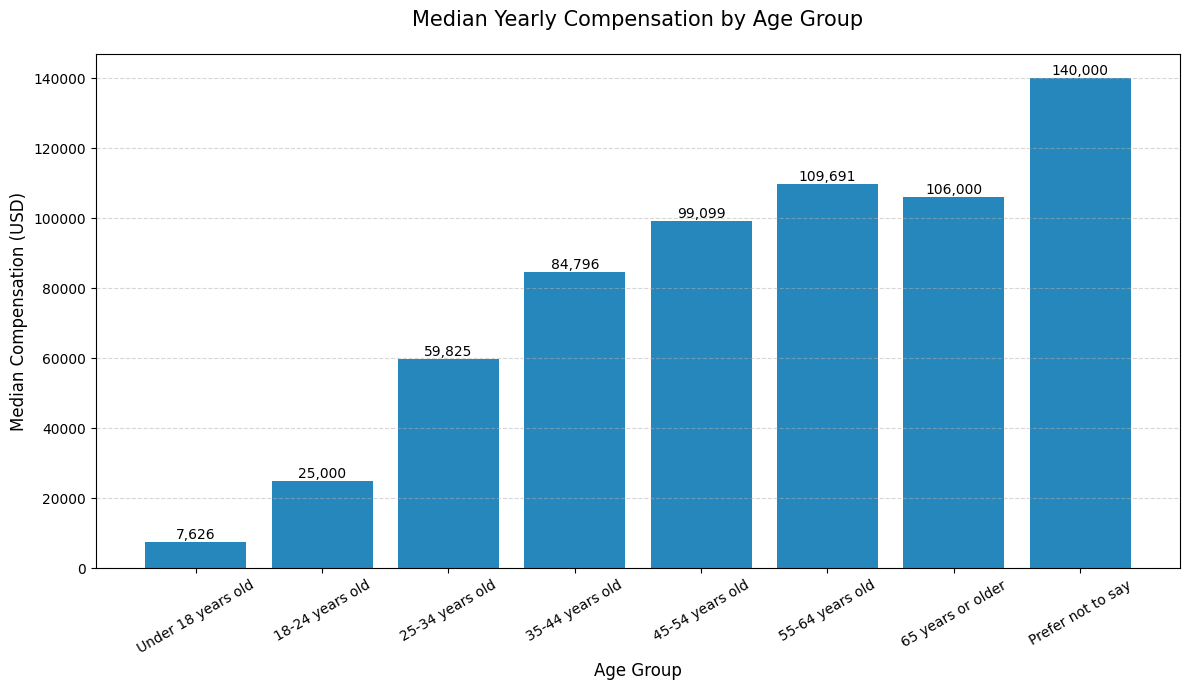

In [46]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Select relevant columns
df_group = df[['Age', 'ConvertedCompYearly']].dropna()

# 2. Define ordered age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# 3. Convert Age to ordered categorical
df_group['Age'] = pd.Categorical(df_group['Age'], categories=age_order, ordered=True)

# 4. Compute median compensation by age group
median_comp = df_group.groupby('Age')['ConvertedCompYearly'].median()

# 5. Plot grouped bar chart (single metric across groups)
plt.figure(figsize=(12, 7))
bars = plt.bar(median_comp.index, median_comp.values, color='#0072B2', alpha=0.85)

plt.title('Median Yearly Compensation by Age Group', fontsize=15, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 6. Add simple annotations on top of each bar
for i, value in enumerate(median_comp.values):
    plt.text(
        i,
        value,
        f'{value:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



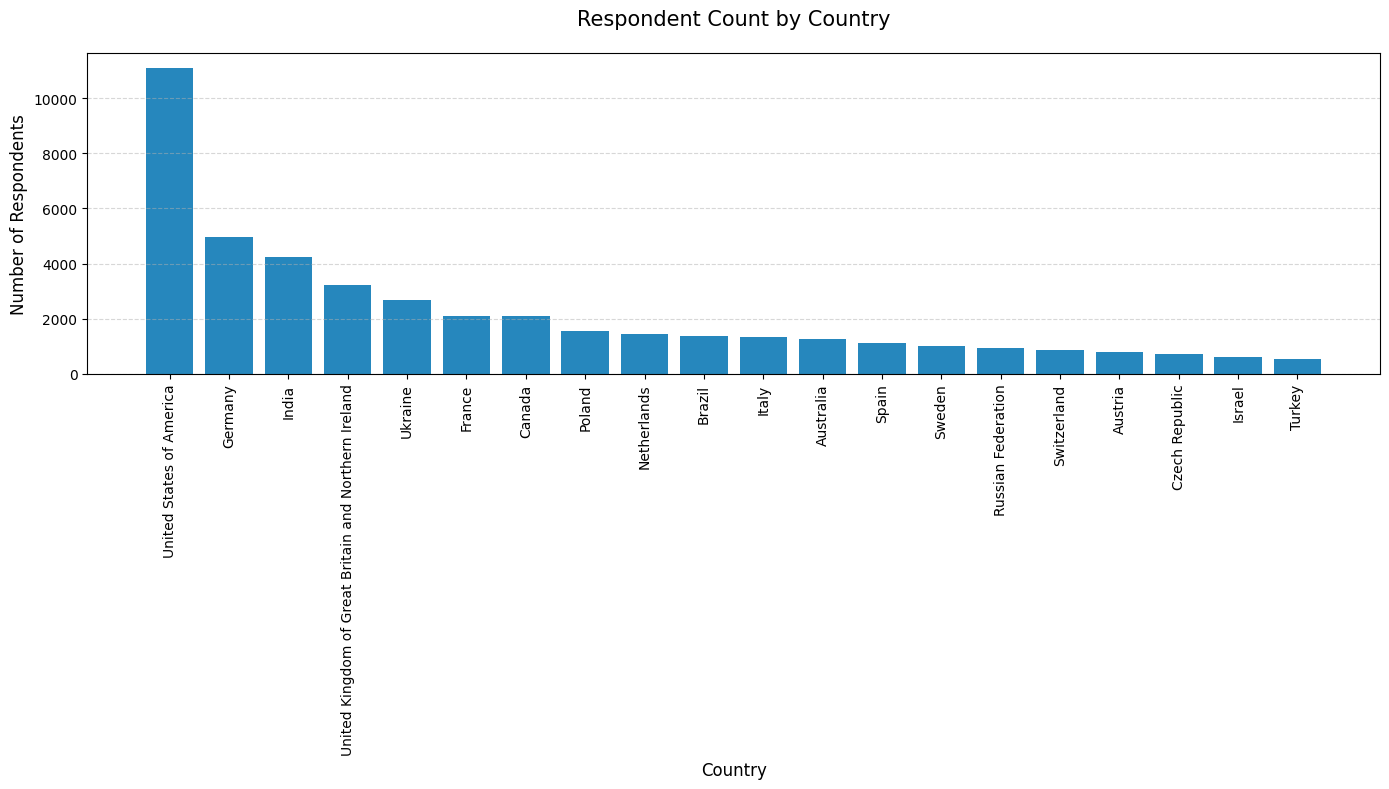

In [49]:
# import pandas as pd
# import matplotlib.pyplot as plt

# 1. Count respondents by country
country_counts = df['Country'].value_counts().head(20)

# 2. Plot
plt.figure(figsize=(14, 8))
plt.bar(country_counts.index, country_counts.values, color='#0072B2', alpha=0.85)

plt.title('Respondent Count by Country', fontsize=15, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
